In [59]:
import os
import h5py
from time import time
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pywt
import scipy
import scipy.io as sio

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset

my_box = dict(boxstyle='round', facecolor='lightgrey', edgecolor='k', alpha=0.5)

In [20]:
df_cylinder = np.zeros((150, 199, 449))
for i in tqdm(range(150), desc='Loading Flow accross cylinder data'):
    df_cylinder[i] = np.load('data/dmd_data/x_{}.npy'.format(i)).reshape(449, 199).T
print('Flow Across Cylinder: {}'.format(df_cylinder.shape))

Loading Flow accross cylinder data: 100%|██████████| 150/150 [00:00<00:00, 232.16it/s]

Flow Across Cylinder: (150, 199, 449)


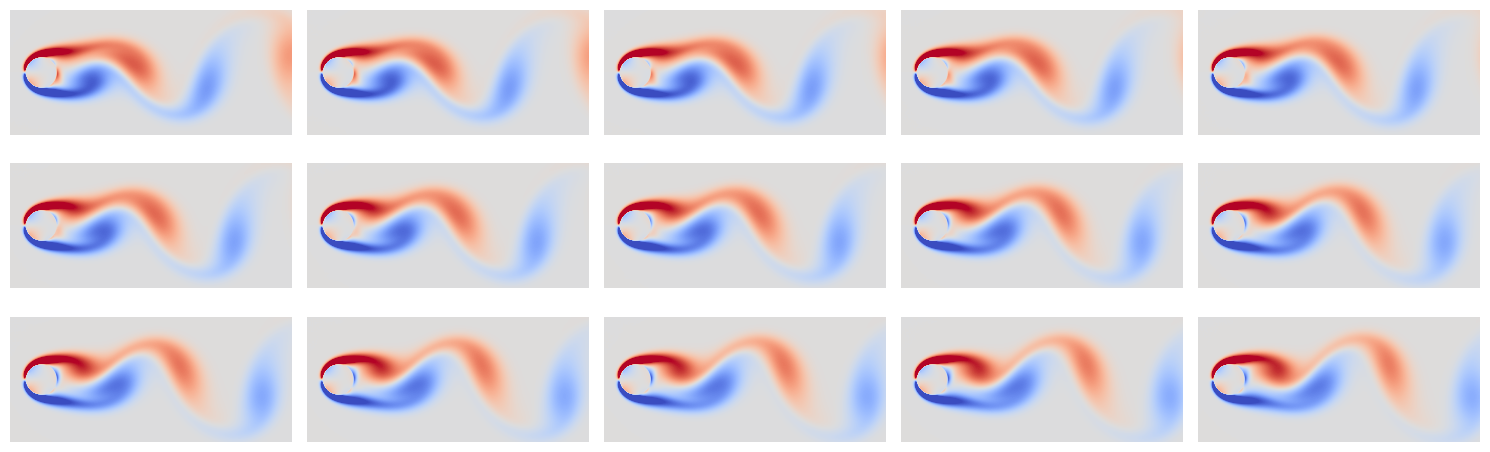

In [23]:
plt.figure(figsize=(15,5))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(df_cylinder[i], cmap='coolwarm', vmin=-3, vmax=3)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [49]:
df_perm = np.rot90(np.load('data/data_1272_128x128.npz')['perm_norm'], k=1, axes=(1,2))
print('Permeability: {}'.format(df_perm.shape))

Permeability: (1272, 128, 128)


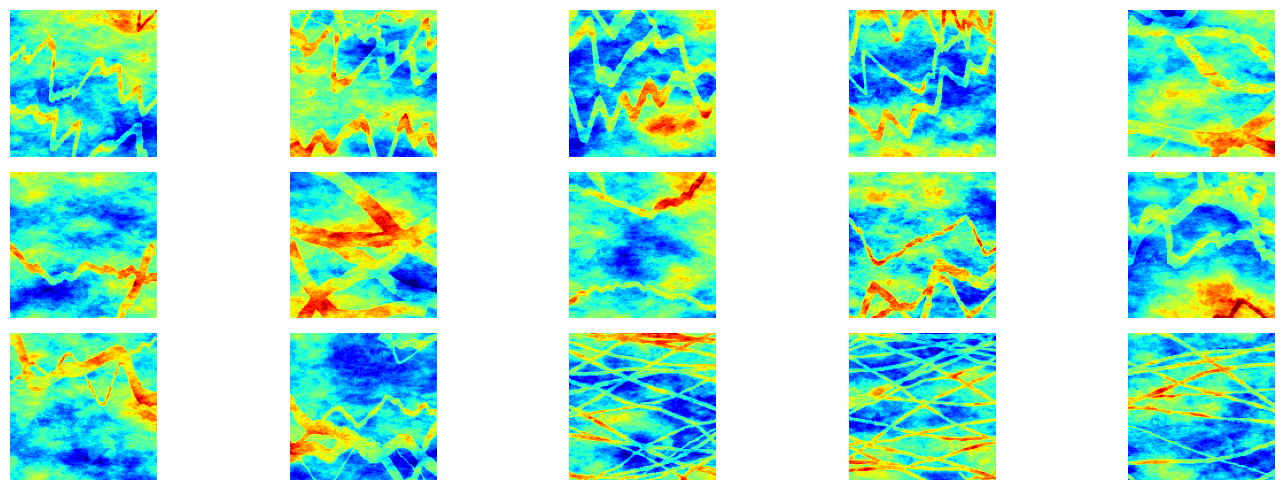

In [50]:
plt.figure(figsize=(15,5))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(df_perm[i], cmap='jet')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [44]:
df_channels = np.moveaxis(np.load('data/MPS_Training_image_and_Realizations_500.npz')['array2'], -1, 0)
print('Channels: {}'.format(df_channels.shape))

Channels: (500, 128, 128)


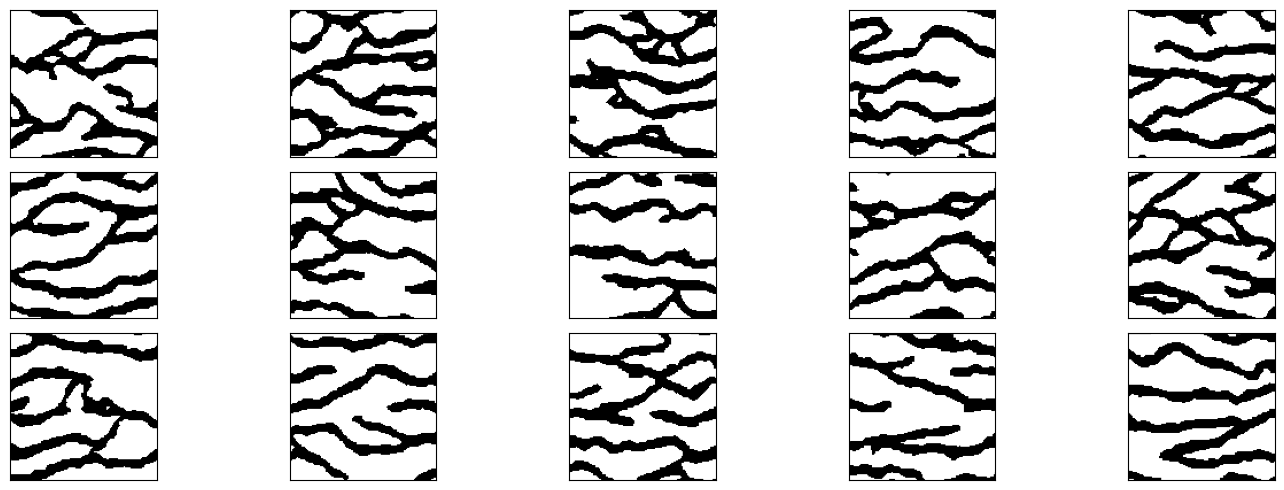

In [46]:
plt.figure(figsize=(15,5))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(df_channels[i], cmap='binary')
    plt.xticks([]); plt.yticks([])
plt.tight_layout()
plt.show()

In [58]:
df_bz = np.array(h5py.File('/mnt/e/temp/data/BZ.mat', 'r')['BZ_tensor'])
print('BZ: {}'.format(df_bz.shape))

BZ: (1200, 451, 351)


In [65]:
from matplotlib.animation import FuncAnimation

In [75]:
k = 0

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.imshow(df_bz[k], cmap='coolwarm')
ax.set(xticks=[], yticks=[], title='t={}'.format(k))
plt.tight_layout()

def update(frame):
    ax.imshow(df_bz[frame], cmap='coolwarm')
    ax.set_title('t={}'.format(frame))
    return ax

ani = FuncAnimation(fig, update, frames=range(0, df_bz.shape[0], 10), interval=100)
ani.save('bz.gif', fps=10)

MovieWriter ffmpeg unavailable; using Pillow instead.
